<a href="https://colab.research.google.com/github/AhmedGwely/Deep-Neural-Network-using-Keras-for-Fashion-MNIST/blob/main/Deep_Neural_Network_using_Keras_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import keras
print(keras.__version__)

2.15.0


In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
(training_img , training_labels) , (test_img , test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
training_img.shape

(60000, 28, 28)

In [6]:
training_labels.shape

(60000,)

In [7]:
test_img.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

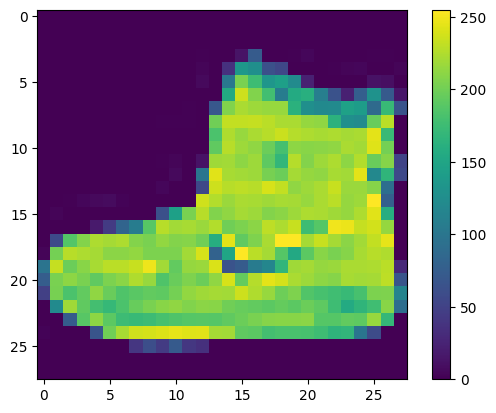

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(training_img[0])
plt.colorbar()  # should come after imshow()
plt.grid(False)

In [10]:
#Normalizing Data
training_img / 255.0
test_img / 255.0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

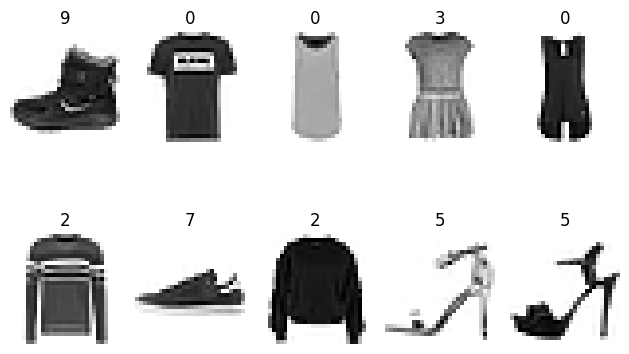

In [11]:

for i in range(10):
    # Load image
    image = training_img[i]  # Load image using PIL
    # Plot image
    plt.subplot(2, 5, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(image,cmap= plt.cm.binary)
    plt.axis('off')  # Turn off axis labels
    plt.title(training_labels[i])  # Add title to each subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot


In [12]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
     ]
)

In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(training_img,training_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 3.0524 - accuracy: 0.6857
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6623 - accuracy: 0.7740
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5643 - accuracy: 0.8044
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5248 - accuracy: 0.8205
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5023 - accuracy: 0.8260
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4864 - accuracy: 0.8322
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4766 - accuracy: 0.8353
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4692 - accuracy: 0.8387
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4684 - accuracy: 0.8385
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.455

In [14]:
test_loss , test_acc = model.evaluate(test_img,test_labels,verbose =2)
print("accuracy ",test_acc)

313/313 - 1s - loss: 0.6096 - accuracy: 0.8132 - 1s/epoch - 3ms/step
accuracy  0.8131999969482422


313/313 [==============================] - 1s 2ms/step
9 >>> Ankel boot


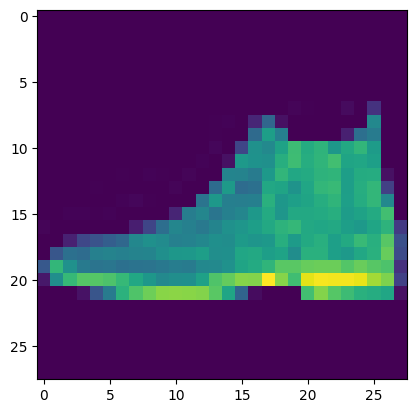

In [15]:
import numpy as np
predict = model.predict(test_img)
pre = np.argmax(predict[0])
if pre == 9:
    print(9,'>>> Ankel boot')
plt.figure()
plt.imshow(test_img[0])